In [1]:
%cd '/content/drive/MyDrive/TrainingData'

/content/drive/MyDrive/TrainingData


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import imblearn
from sklearn.model_selection import train_test_split

In [3]:
def downsample(x, y, win_len=0.1):
    agg_x = pd.DataFrame()
    for center in y['time']:
        window_start = center - win_len/2
        window_end = center + win_len/2
        windowed_signal = x[(x["time"] > window_start) & (x["time"] < window_end)][['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z']]
        aggregate_data = windowed_signal.mean().to_frame().T
        aggregate_data['time'] =  center
        agg_x = pd.concat([agg_x, aggregate_data], axis=0)
    
    return pd.concat([agg_x.reset_index(drop=True), y['label']], axis=1)

In [4]:
# data_root = ''
# X_TIME = 'subject_{}_{}__x_time.csv'
# X_DATA = 'subject_{}_{}__x.csv'

# Y_TIME = 'subject_{}_{}__y_time.csv'
# Y_DATA = 'subject_{}_{}__y.csv'

In [5]:
# files_x_data = sorted(glob.glob(data_root+X_DATA.format('*', '*')))
# files_x_time = sorted(glob.glob(data_root+X_TIME.format('*', '*')))

# files_y_data = sorted(glob.glob(data_root+Y_DATA.format('*', '*')))
# files_y_time = sorted(glob.glob(data_root+Y_TIME.format('*', '*')))

In [6]:
# merged_data = pd.DataFrame()

In [7]:
# for i in range(len(files_x_data)):
#     y_data = pd.read_csv(files_y_data[i], names=['label'])
#     y_time = pd.read_csv(files_y_time[i], names=['time'])

#     x_data = pd.read_csv(files_x_data[i], names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
#     x_time = pd.read_csv(files_x_time[i], names=['time'])

#     x_data = pd.concat([x_data, x_time], axis=1)
#     y_data = pd.concat([y_data, y_time], axis=1)
     
#     dwn_smp = downsample(x_data, y_data)
    
#     merged_data = pd.concat([merged_data, dwn_smp], axis=0).reset_index(drop=True)

In [8]:
# merged_data.to_csv('merged_data.csv', index=False)

In [9]:
merged_data = pd.read_csv('merged_data.csv')
X = merged_data[['accr_x','accr_y','accr_z','gyr_x','gyr_y','gyr_z','time']]
Y = merged_data[['label']]

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain, Ytrain = oversample.fit_resample(X, Y)

In [11]:
print(Y.value_counts(normalize=True),'\n')
print(Ytrain.value_counts(normalize=True))
print(len(Y))
print(len(Ytrain))

label
0        0.750517
3        0.153867
2        0.054461
1        0.041155
dtype: float64 

label
0        0.25
1        0.25
2        0.25
3        0.25
dtype: float64
335413
1006932


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(Xtrain, Ytrain, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_valid)

<ipython-input-12-1ce1c3c0b0eb>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


In [17]:
valid_accuracy = accuracy_score(Y_valid, Y_pred)
print("Valid Accuracy:", valid_accuracy)

Valid Accuracy: 0.9113448236480011


In [18]:
Y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_pred_train)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9999975172088462


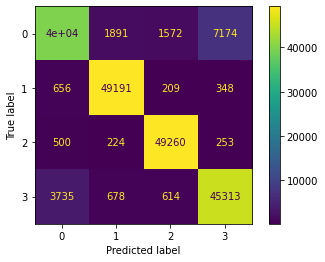

In [14]:
cm = confusion_matrix(Y_valid, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [16]:
# precision = precision_score(Y_valid, Y_pred)
# print("Precision:", precision)
# recall = recall_score(Y_valid, Y_pred)
# print("Recall:", recall)

from sklearn.metrics import f1_score
score = f1_score(Y_valid, Y_pred, average="macro")
print("Macro F1-Score: ", score)

score = f1_score(Y_valid, Y_pred, average="micro")
print("Micro F1-Score: ", score)

score = f1_score(Y_valid, Y_pred, average="weighted")
print("Weighted F1-Score: ", score)

Macro F1-Score:  0.9101660940806923
Micro F1-Score:  0.9113448236480011
Weighted F1-Score:  0.9101290994180005


In [20]:
%cd '/content/drive/MyDrive/TestData'

/content/drive/MyDrive/TestData


In [42]:
data_root = ''
X_TIME = 'subject_012_01__x_time.csv'
X_DATA = 'subject_012_01__x.csv'

Y_TIME = 'subject_012_01__y_time.csv'
Y_DATA = 'subject_012_01__y.csv'

In [43]:
files_x_data = sorted(glob.glob(data_root+X_DATA.format('*', '*')))
files_x_time = sorted(glob.glob(data_root+X_TIME.format('*', '*')))
files_y_time = sorted(glob.glob(data_root+Y_TIME.format('*', '*')))

In [44]:
def test_downsample(x, y, win_len=0.1):
    agg_x = pd.DataFrame()
    for center in y['time']:
        window_start = center - win_len/2
        window_end = center + win_len/2
        windowed_signal = x[(x["time"] > window_start) & (x["time"] < window_end)][['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z']]
        aggregate_data = windowed_signal.mean().to_frame().T
        aggregate_data['time'] =  center
        agg_x = pd.concat([agg_x, aggregate_data], axis=0)
    return agg_x

In [45]:
for i in range(len(files_x_data)):
    
    y_time = pd.read_csv(files_y_time[i], names=['time'])

    x_data = pd.read_csv(files_x_data[i], names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
    x_time = pd.read_csv(files_x_time[i], names=['time'])

    x_data = pd.concat([x_data, x_time], axis=1)
         
    dwn_smp = test_downsample(x_data, y_time)
    
    merged_data = pd.concat([dwn_smp], axis=0).reset_index(drop=True)

    Y_pred_test = rf.predict(merged_data)

    pd.DataFrame(Y_pred_test).to_csv(data_root+Y_DATA)